In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,NaN,4.49,76.3,NaN,NaN
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,NaN,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,NaN,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  160 non-null    float64
 2   exports     160 non-null    float64
 3   health      158 non-null    float64
 4   imports     161 non-null    float64
 5   income      164 non-null    float64
 6   inflation   164 non-null    float64
 7   life_expec  164 non-null    float64
 8   total_fer   163 non-null    float64
 9   gdpp        162 non-null    float64
dtypes: float64(9), object(1)
memory usage: 13.2+ KB


In [4]:
df.shape

(167, 10)

In [5]:
missing_values = df.isnull().sum()
print("Missing Values Before Mean Imputation are: ",missing_values)

Missing Values Before Mean Imputation are:  country       0
child_mort    7
exports       7
health        9
imports       6
income        3
inflation     3
life_expec    3
total_fer     4
gdpp          5
dtype: int64


In [6]:
# List of specific columns to fill missing values with mean
columns_to_fill = ['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']  # Replace with actual column names

# Fill missing values only in specified columns
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

# Check if missing values are filled
print("Missing Values After Mean Imputation are: ")
print(df[columns_to_fill].isnull().sum())

Missing Values After Mean Imputation are: 
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.00000
mean,39.166250,40.041306,6.865253,47.201030,17134.713415,7.770646,70.551829,2.938834,12959.08642
std,39.919272,24.112215,2.647423,23.979285,19149.025238,10.542537,8.786089,1.482508,18015.27046
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.00000
25%,8.600000,23.800000,5.070000,30.850000,3545.000000,1.865000,65.350000,1.820000,1365.00000
50%,21.500000,35.400000,6.680000,43.700000,10500.000000,5.440000,72.800000,2.470000,5190.00000
75%,60.400000,50.650000,8.525000,58.350000,22500.000000,10.350000,76.750000,3.845000,13500.00000
max,208.000000,175.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.00000


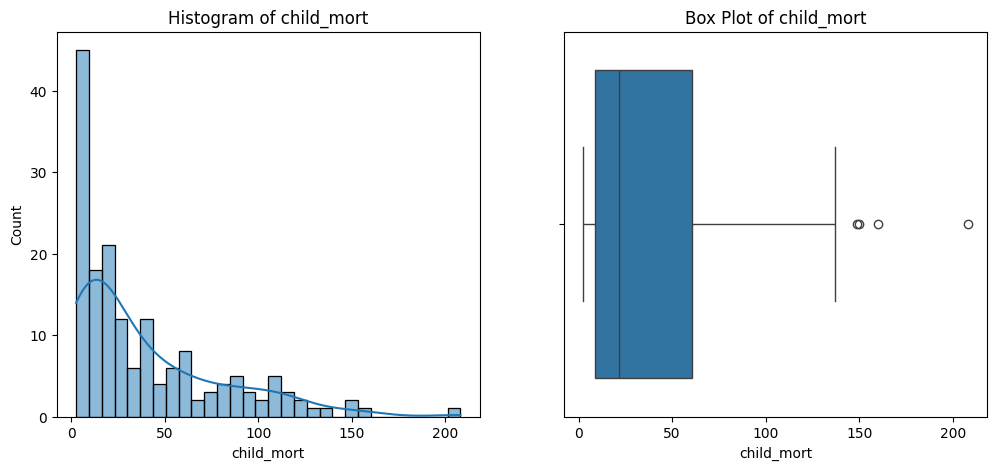

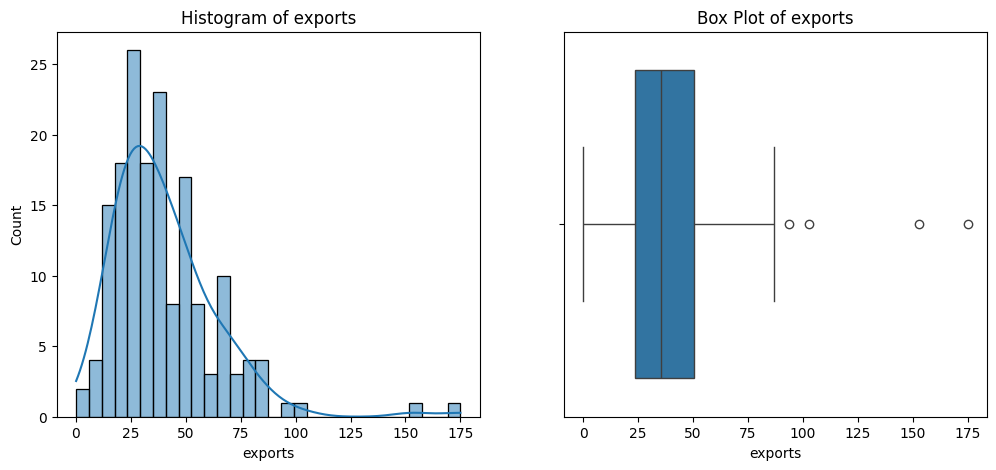

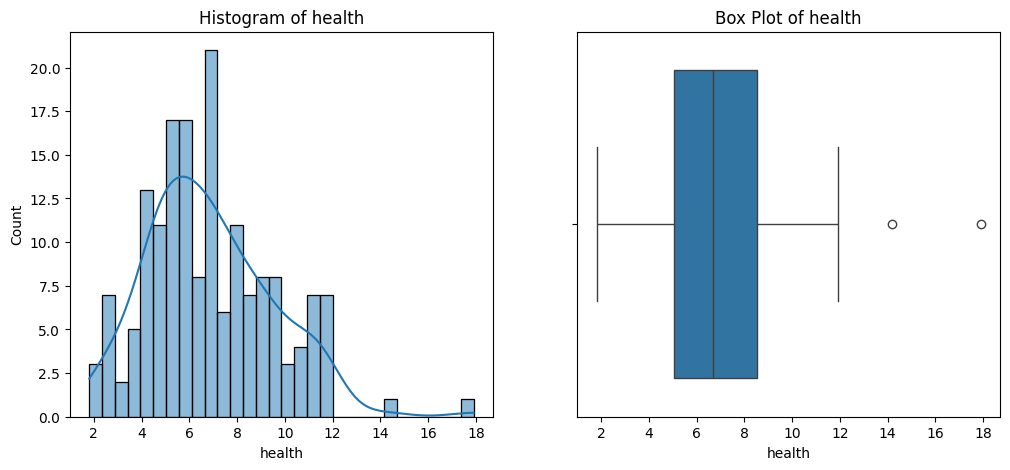

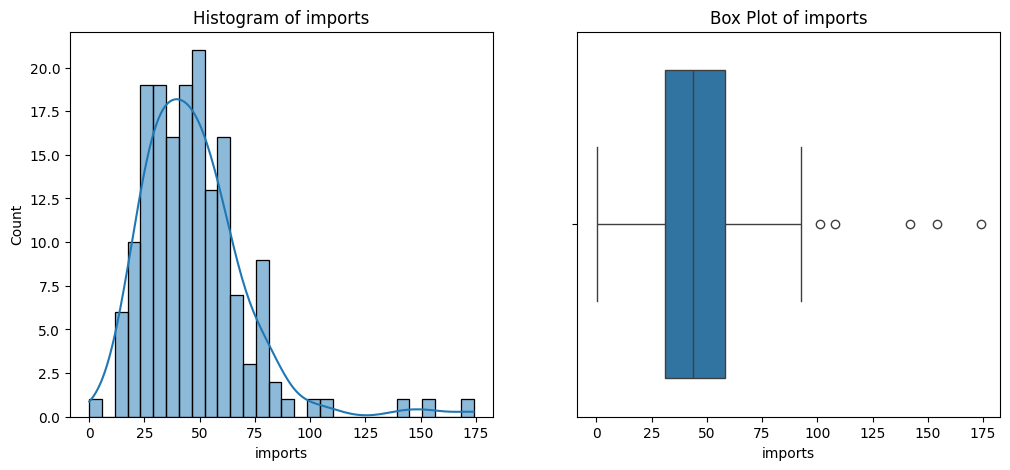

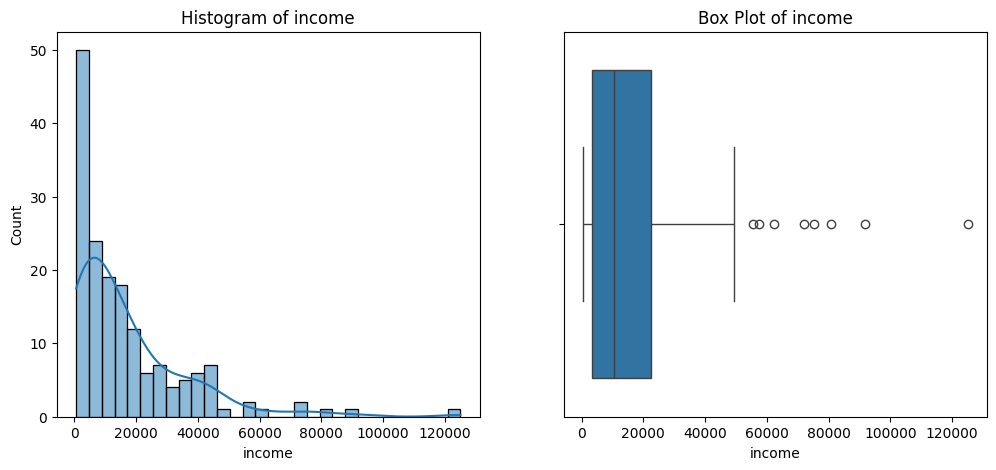

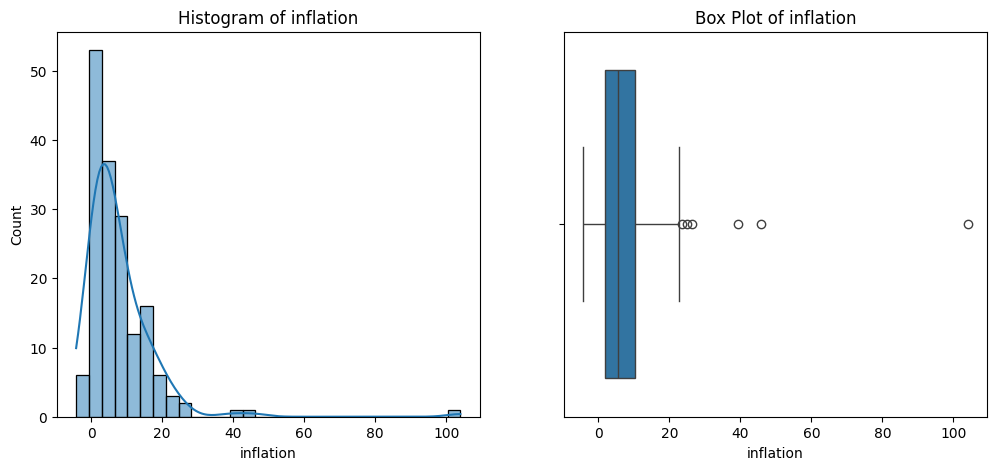

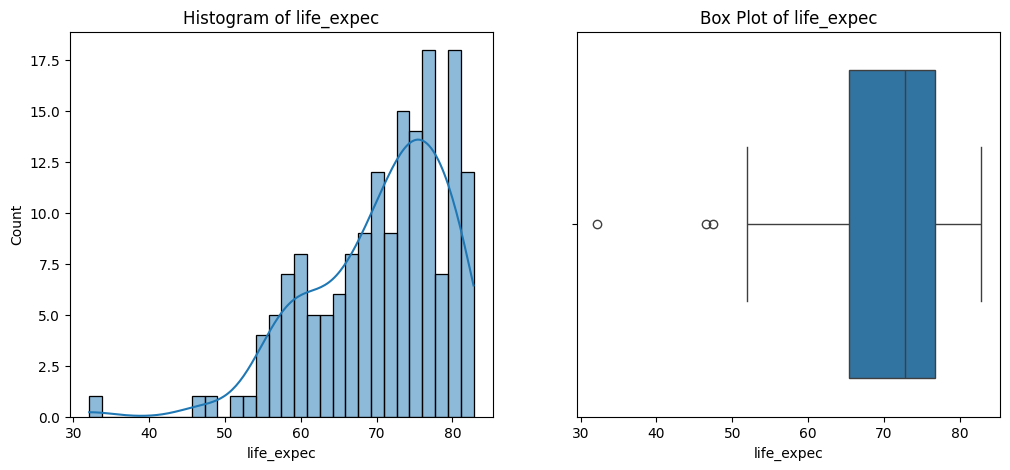

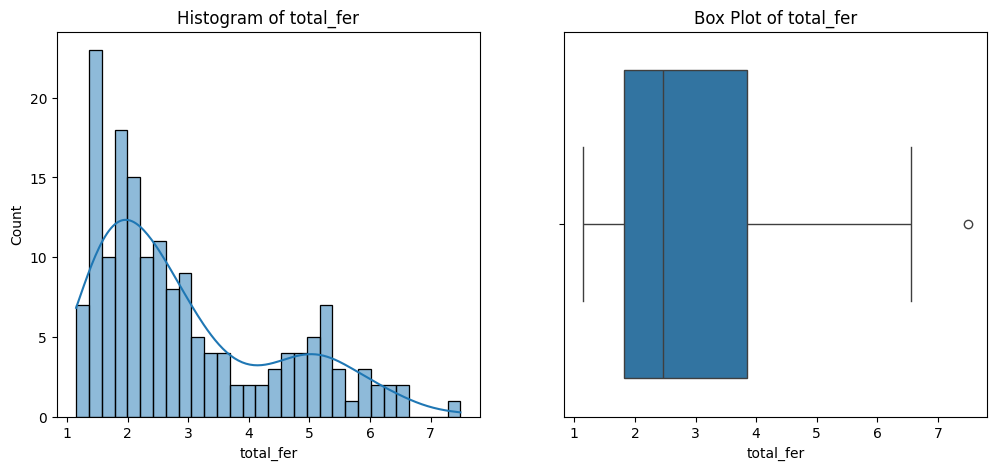

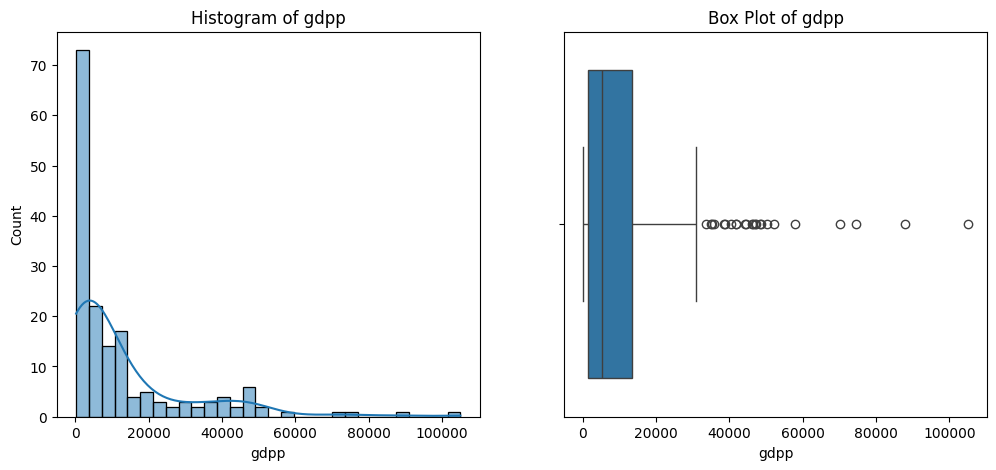

In [8]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

    plt.show()

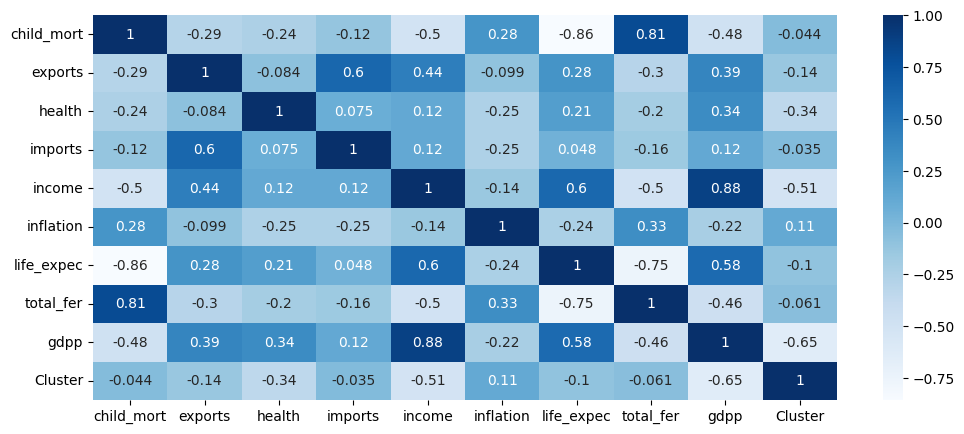

In [18]:
# Drop non-numeric columns (like 'Country')
df_numeric = df.select_dtypes(include=['number']).copy()

# Create heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Blues')
plt.show()

In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [19]:
# --- Step 1: Finding the Optimal K using the Elbow Method ---
wcss = []  # Within-Cluster Sum of Squares
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

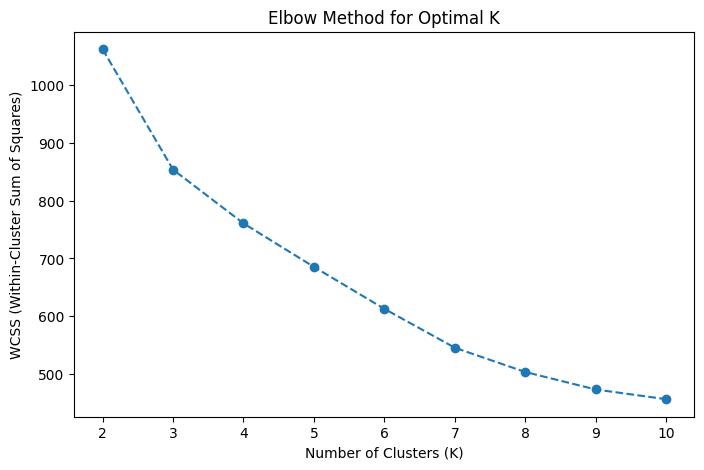

In [20]:
# Plot the Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [33]:
# --- Step 2: Compute Evaluation Metrics for Each K ---
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

In [34]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_scaled)

    silhouette = silhouette_score(df_scaled, clusters)
    calinski_harabasz = calinski_harabasz_score(df_scaled, clusters)
    davies_bouldin = davies_bouldin_score(df_scaled, clusters)

    silhouette_scores.append(silhouette)
    calinski_harabasz_scores.append(calinski_harabasz)
    davies_bouldin_scores.append(davies_bouldin)

    print(f"k={k} | Silhouette: {silhouette:.4f}, Calinski-Harabasz: {calinski_harabasz:.4f}, Davies-Bouldin: {davies_bouldin:.4f}")



k=2 | Silhouette: 0.2753, Calinski-Harabasz: 68.3973, Davies-Bouldin: 1.3539
k=3 | Silhouette: 0.2734, Calinski-Harabasz: 62.3302, Davies-Bouldin: 1.3233
k=4 | Silhouette: 0.2646, Calinski-Harabasz: 53.0126, Davies-Bouldin: 1.3192
k=5 | Silhouette: 0.2469, Calinski-Harabasz: 48.3223, Davies-Bouldin: 1.0903
k=6 | Silhouette: 0.2161, Calinski-Harabasz: 46.8013, Davies-Bouldin: 1.1848
k=7 | Silhouette: 0.2348, Calinski-Harabasz: 46.8448, Davies-Bouldin: 1.0738
k=8 | Silhouette: 0.2257, Calinski-Harabasz: 45.1336, Davies-Bouldin: 1.1014
k=9 | Silhouette: 0.1909, Calinski-Harabasz: 43.0231, Davies-Bouldin: 1.2568
k=10 | Silhouette: 0.2044, Calinski-Harabasz: 40.0493, Davies-Bouldin: 1.1153


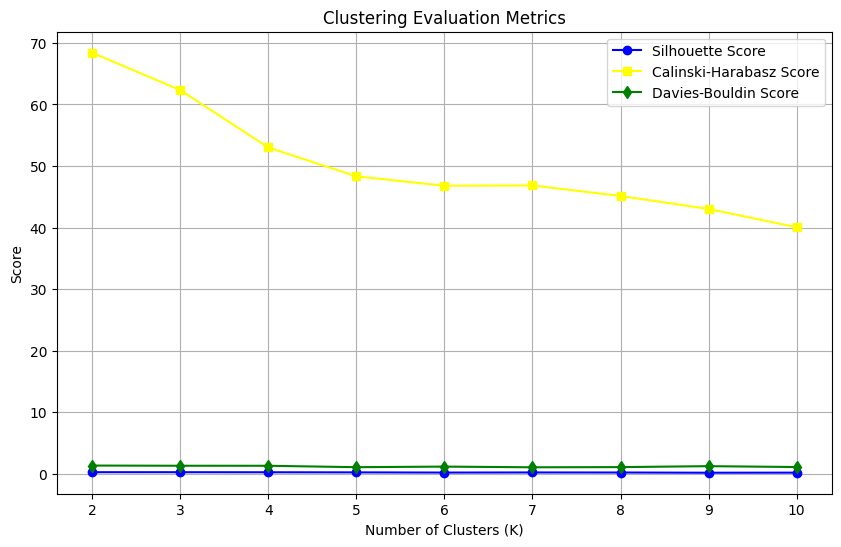

In [35]:
plt.figure(figsize=(10, 6))

plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='blue', label="Silhouette Score")
plt.plot(K_range, calinski_harabasz_scores, marker='s', linestyle='-', color='yellow', label="Calinski-Harabasz Score")
plt.plot(K_range, davies_bouldin_scores, marker='d', linestyle='-', color='green', label="Davies-Bouldin Score")

plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.title('Clustering Evaluation Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# --- Step 4: Apply K-Means with Optimal K ---
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)
# Add cluster labels to dataframe
df['Cluster'] = clusters

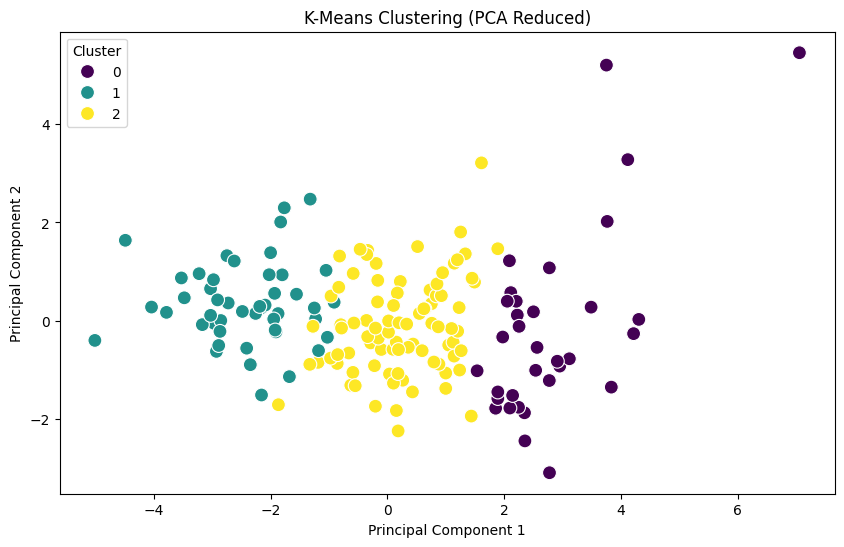

In [38]:
# --- Step 5: Visualizing the Clusters ---
# PCA for 2D Visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatter plot of first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette="viridis", edgecolor="w", s=100)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (PCA Reduced)")
plt.legend(title="Cluster")
plt.show()